In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [59]:
from scipy.stats import norm

In [26]:
#read output of Citibike_Data_Preparation_Vivek_P notebook
bikeChrono = pd.read_csv('chronological_dataset.csv')

In [27]:
bikeChrono.describe()

,year,month,day,hour,concurrent_riders,avg_distance,avg_trip_duration
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,2019.500684,6.519836,15.738714,11.500000,2985.784029,5.953685,58.597990
std,0.500014,3.449649,8.804172,6.922384,2748.134743,8.218323,91.480762
min,2019.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,2019.000000,4.000000,8.000000,5.750000,680.000000,1.042291,9.868932
50%,2020.000000,7.000000,16.000000,11.500000,2218.500000,3.848847,35.965251
75%,2020.000000,10.000000,23.000000,17.250000,4517.000000,7.828071,74.220521
max,2020.000000,12.000000,31.000000,23.000000,13807.000000,140.806594,1764.233446


In [49]:
#Filter out trips with 0 duration
bikeChronoFilt = bikeChrono.loc[bikeChrono['avg_trip_duration']>0]


In [128]:
Months = [8,9,10]

In [129]:
#Define pre-pandemic timeframe 
bikeChrono2019 = bikeChronoFilt.loc[(bikeChronoFilt['year']==2019) & \
                                    (bikeChronoFilt['month'].isin(Months))]

In [130]:
bikeChrono2020 = bikeChronoFilt.loc[(bikeChronoFilt['year']==2020) & \
                                     (bikeChronoFilt['month'].isin(Months))]

In [131]:
#define function to perform distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

Average Trip Duration

Log mean = 1.39(24.66), mean = 45.64
Standard deviation = 0.58
1 percentile = 0.92
5 percentile = 1.66
25 percentile = 9.97
50 percentile = 36.00
75 percentile = 68.21
95 percentile = 128.37
99 percentile = 174.50


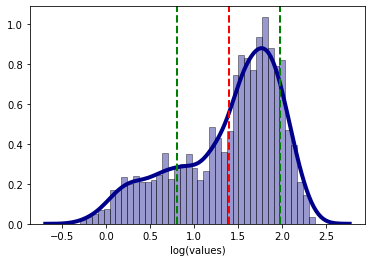

In [132]:
#Log scale distribution of trip duration 2019
distribution_analysis(bikeChrono2019.avg_trip_duration, log_scale=True, bins= 40)


Log mean = 1.47(29.39), mean = 52.98
Standard deviation = 0.56
1 percentile = 1.08
5 percentile = 2.19
25 percentile = 13.31
50 percentile = 41.76
75 percentile = 77.97
95 percentile = 149.00
99 percentile = 181.34


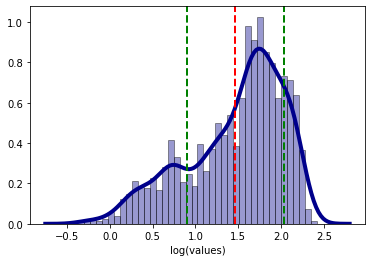

In [133]:
#Log scale distribution of trip duration 2020
distribution_analysis(bikeChrono2020.avg_trip_duration, log_scale=True, bins= 40)

In [134]:
#TTest of trip duration
stats.ttest_ind(bikeChrono2019['avg_trip_duration'],bikeChrono2020['avg_trip_duration'])


Ttest_indResult(statistic=-5.515258636348692, pvalue=3.681627056768171e-08)

Concurrent Riders

Mean = 3950.88
Standard deviation = 3075.17
1 percentile = 181.14
5 percentile = 272.35
25 percentile = 981.25
50 percentile = 3659.50
75 percentile = 6033.75
95 percentile = 9714.20
99 percentile = 11660.72


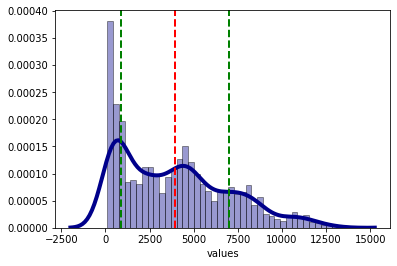

In [135]:
#Distribution of concurrent riders 2019
distribution_analysis(bikeChrono2019.concurrent_riders, log_scale=False, bins= 40)

Mean = 4352.41
Standard deviation = 3368.79
1 percentile = 299.07
5 percentile = 426.00
25 percentile = 1212.50
50 percentile = 3867.50
75 percentile = 6548.75
95 percentile = 10816.60
99 percentile = 12281.48


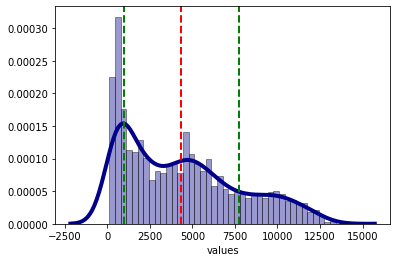

In [136]:
#Distribution of concurrent riders 2020
distribution_analysis(bikeChrono2020.concurrent_riders, log_scale=False, bins= 40)


In [137]:
stats.ttest_ind(bikeChrono2019['concurrent_riders'],bikeChrono2020['concurrent_riders'])


Ttest_indResult(statistic=-4.136508943295821, pvalue=3.591909236102308e-05)

Average Distance

Log mean = 0.43(2.69), mean = 5.00
Standard deviation = 0.58
1 percentile = 0.11
5 percentile = 0.19
25 percentile = 1.10
50 percentile = 3.94
75 percentile = 7.25
95 percentile = 13.66
99 percentile = 21.52


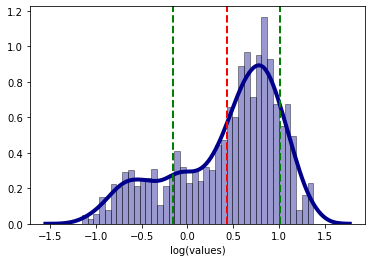

In [138]:
#Log scale distribution of trip duration 2019
distribution_analysis(bikeChrono2019.avg_distance, log_scale=True, bins= 40)

Log mean = 0.46(2.89), mean = 5.08
Standard deviation = 0.56
1 percentile = 0.14
5 percentile = 0.24
25 percentile = 1.16
50 percentile = 4.45
75 percentile = 7.77
95 percentile = 13.30
99 percentile = 15.05


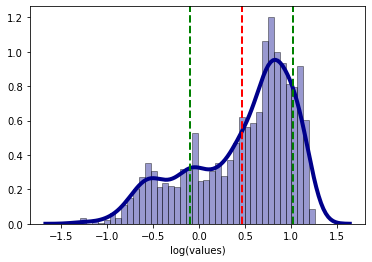

In [139]:
#Log scale distribution of trip duration 2020
distribution_analysis(bikeChrono2020.avg_distance, log_scale=True, bins= 40)

In [140]:
stats.ttest_ind(bikeChrono2019['avg_distance'],bikeChrono2020['avg_distance'])


Ttest_indResult(statistic=-0.5918343723287208, pvalue=0.5539918142110043)